In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression





In [3]:
diabetes_csv_filepath=Path(r"C:\Users\kwame\OneDrive\Desktop\UNI STUFF\COMPUTER SCIENCE\L300\DCIT311\handson-ml3-main\Kwame x Dzorka\diabetes.csv")
diabetesCsv= pd.read_csv(diabetes_csv_filepath)
'''LOADED CSV FILE INTO A PANDAS DATAFRAME'''
diabetesCsv.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetesCsv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Small dataset containing 768 entries,may be prone to overfitting.
No null values in the dataset.

In [5]:
print(diabetesCsv["Outcome"].value_counts())


0    500
1    268
Name: Outcome, dtype: int64


That was to show the number of distinct categories of the Outcome column.

"""what values do i have and how many"""

In [6]:
diabetesCsv.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Might need to scale some features

Picking our training,test and validation set. 
Separate data into training set and test set (80:20).Training set is divided into sections(10) and each model is evaluated once per validation set after it is trained on the rest of the sections. By averaging out all the evaluations of a model, you get a much more accurate measure of its performance. There is a drawback, however: the training time is multiplied by the number of validation sets.

In [7]:
# Get unique values from the column and sort them
unique_values = sorted(diabetesCsv['Glucose'].unique())
# Print the sorted list
print(unique_values)


[0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199]


Performing stratified sampling on the data. Dividing rows into strata based on insulin levels

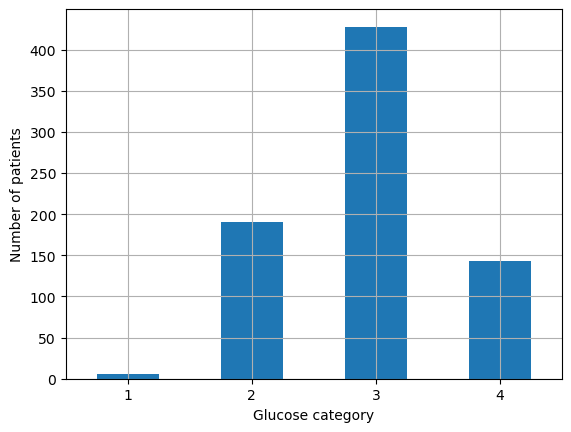

In [8]:
# Define bin edges and labels
bins = [0., 50, 100, 150,  np.inf] 
labels = [1, 2, 3, 4]

# Create the "insulin_cat" column
diabetesCsv["glucose_cat"] = pd.cut(diabetesCsv["Glucose"], bins=bins, labels=labels, right=False) #created a new category
diabetesCsv["glucose_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Glucose category")
plt.ylabel("Number of patients")
plt.show()


In [9]:
strat_train_set, strat_test_set = train_test_split(
 diabetesCsv, test_size=0.2, stratify=diabetesCsv["glucose_cat"], random_state=42)

In [10]:

print(strat_train_set["glucose_cat"].value_counts())
print(f"\nThe number of testing instances is {len(strat_train_set)}")

3    342
2    153
4    114
1      5
Name: glucose_cat, dtype: int64

The number of testing instances is 614


We can now drop the glucose categories since they no longer serve any purpose.

In [11]:
for set_ in (strat_train_set, strat_test_set):
     set_.drop("glucose_cat", axis=1, inplace=True)


In [12]:
'''experimental training set for data exploration'''
exp=strat_train_set.copy()

In [13]:
corr_matrix = exp.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.447528
BMI                         0.291599
Age                         0.261635
Pregnancies                 0.234918
DiabetesPedigreeFunction    0.140987
Insulin                     0.123241
BloodPressure               0.068079
SkinThickness               0.045533
Name: Outcome, dtype: float64

NB. Don't use accuracy as a performance measure,if you simply ask your model to classify every instance as non diabetic (the more common outcome) it will have an accuracy score of about 80%

confusion matrices,precision,recall ,f1 score

In [14]:
exp_features=strat_train_set.drop("Outcome",axis=1)
exp_labels=strat_train_set["Outcome"].copy()

Seperated data into features and targets so cleaning and transformations can be applied to the features

scaling using standardization
Standardization is different: first it subtracts the mean value (so standardized values
have a zero mean), then it divides the result by the standard deviation (so standard‐
ized values have a standard deviation equal to 1). Unlike min-max scaling, standardi‐
zation does not restrict values to a specific range. However, standardization is much
less affected by outliers. 

In [15]:
exp_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
643,4,90,0,0,0,28.0,0.610,31
367,0,101,64,17,0,21.0,0.252,21
734,2,105,75,0,0,23.3,0.560,53
31,3,158,76,36,245,31.6,0.851,28
682,0,95,64,39,105,44.6,0.366,22


In [16]:
cols=exp_features.columns
std_scaler = StandardScaler()
exp_features_ar = std_scaler.fit_transform(exp_features)
# Create a new DataFrame with the scaled features and the excluded column
exp_features = pd.DataFrame(exp_features_ar, columns=cols)
exp_features.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.007078,-0.967990,-3.486530,-1.298546,-0.700744,-0.500536,0.447785,-0.232627
1,-1.151827,-0.622074,-0.255164,-0.224434,-0.700744,-1.420997,-0.663812,-1.057775
2,-0.572375,-0.496287,0.300227,-1.298546,-0.700744,-1.118559,0.292534,1.582698
3,-0.282648,1.170397,0.350717,0.976044,1.467487,-0.027156,1.196095,-0.480171
4,-1.151827,-0.810755,-0.255164,1.165594,0.228498,1.682272,-0.309839,-0.975260


CLASSIFICATION TREE ALGORITHM

In [17]:
clf = DecisionTreeClassifier(random_state=42)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1','roc_auc']


cross_val_scores = cross_validate(clf, exp_features, exp_labels, cv=10,scoring=scoring_metrics)

# Display cross-validation scores
for metric in scoring_metrics:
    print(f"Mean {metric.capitalize()}: {np.mean(cross_val_scores[f'test_{metric}']):.4f}")


Mean Accuracy: 0.6872
Mean Precision: 0.5510
Mean Recall: 0.5457
Mean F1: 0.5430
Mean Roc_auc: 0.6541


Support Vector Machine

In [18]:
svm_clf = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(exp_features, exp_labels)
svm_cross_val_scores = cross_validate(svm_clf, exp_features, exp_labels, cv=10,scoring=scoring_metrics)

# Display cross-validation scores
for metric in scoring_metrics:
    print(f"Mean {metric.capitalize()}: {np.mean(svm_cross_val_scores[f'test_{metric}']):.4f}")



Mean Accuracy: 0.7574
Mean Precision: 0.6905
Mean Recall: 0.5515
Mean F1: 0.6066
Mean Roc_auc: 0.8286


KNN

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(exp_features, exp_labels)
knn_cross_val_scores = cross_validate(knn_classifier, exp_features, exp_labels, cv=10,scoring=scoring_metrics)

# Display cross-validation scores
for metric in scoring_metrics:
    print(f"Mean {metric.capitalize()}: {np.mean(knn_cross_val_scores[f'test_{metric}']):.4f}")




Mean Accuracy: 0.7035
Mean Precision: 0.5937
Mean Recall: 0.5139
Mean F1: 0.5447
Mean Roc_auc: 0.7269


Naive Bayes

In [20]:
nb_classifier = GaussianNB()
nb_classifier.fit(exp_features, exp_labels)
nb_cross_val_scores = cross_validate(nb_classifier, exp_features, exp_labels, cv=10,scoring=scoring_metrics)

# Display cross-validation scores
for metric in scoring_metrics:
    print(f"Mean {metric.capitalize()}: {np.mean(nb_cross_val_scores[f'test_{metric}']):.4f}")



Mean Accuracy: 0.7313
Mean Precision: 0.6376
Mean Recall: 0.5621
Mean F1: 0.5877
Mean Roc_auc: 0.8026


Random Forest

In [21]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(exp_features, exp_labels)
rf_cross_val_scores = cross_validate(rf_classifier, exp_features, exp_labels, cv=10,scoring=scoring_metrics)

# Display cross-validation scores
for metric in scoring_metrics:
    print(f"Mean {metric.capitalize()}: {np.mean(rf_cross_val_scores[f'test_{metric}']):.4f}")




Mean Accuracy: 0.7491
Mean Precision: 0.6669
Mean Recall: 0.5703
Mean F1: 0.6070
Mean Roc_auc: 0.8082


Neural Network

In [22]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
nn_classifier.fit(exp_features, exp_labels)
nn_cross_val_scores = cross_validate(nn_classifier, exp_features, exp_labels, cv=10,scoring=scoring_metrics)

# Display cross-validation scores
for metric in scoring_metrics:
    print(f"Mean {metric.capitalize()}: {np.mean(nn_cross_val_scores[f'test_{metric}']):.4f}")



Mean Accuracy: 0.7281
Mean Precision: 0.6105
Mean Recall: 0.6126
Mean F1: 0.6050
Mean Roc_auc: 0.8096


AdaBoost

In [23]:
# Create a base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create an AdaBoost classifier with the base classifier
ab_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
ab_classifier.fit(exp_features, exp_labels)
ab_cross_val_scores = cross_validate(ab_classifier, exp_features, exp_labels, cv=10,scoring=scoring_metrics)

# Display cross-validation scores
for metric in scoring_metrics:
    print(f"Mean {metric.capitalize()}: {np.mean(ab_cross_val_scores[f'test_{metric}']):.4f}")



Mean Accuracy: 0.7509
Mean Precision: 0.6611
Mean Recall: 0.5794
Mean F1: 0.6090
Mean Roc_auc: 0.7977


In [24]:
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(exp_features, exp_labels)
from sklearn.model_selection import cross_validate

# Display cross-validation scores
for metric in scoring_metrics:
    print(f"Mean {metric.capitalize()}: {np.mean(logreg_cross_val_scores[f'test_{metric}']):.4f}")


Mean Accuracy: 0.7590
Mean Precision: 0.6986
Mean Recall: 0.5522
Mean F1: 0.6092
Mean Roc_auc: 0.8264
